In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import math

## Loading data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,0,...,1,12.0,5,-6,48,1022,-5,5.0,0.0,46


In [4]:
test.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,Region_AreaKM2,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2018,0,1,0,Hyper Market,General,326,7,9643,...,6,14.0,5,-1,46,1011,2,10.0,0.00,180
1,1000,02/03/2018,0,1,0,Hyper Market,General,326,7,9643,...,4,12.0,6,-1,52,1009,3,10.0,5.08,315
2,1000,03/03/2018,0,1,0,Hyper Market,General,326,7,9643,...,3,13.0,11,-3,41,1013,-2,10.0,0.00,210
3,1000,04/03/2018,0,0,0,Hyper Market,General,326,7,9643,...,6,11.0,18,-2,65,1002,1,6.0,3.05,193
4,1000,05/03/2018,0,1,1,Hyper Market,General,326,7,9643,...,6,10.0,23,-5,25,1000,2,8.0,0.25,247


In [5]:
train.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,523021.000000,523021.000000,523021.000000,523021.000000,523021.00000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,...,523021.000000,511683.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,511683.000000,523021.000000,523021.000000
mean,1373.953914,0.029718,0.829714,0.383292,8002.71122,5.713151,259.325073,4057.377536,12381.265718,14050.547848,...,10.273205,12.151025,11.724961,3.737584,51.375624,1012.078435,6.202315,7.223408,0.808278,170.458096
std,216.395820,0.169808,0.375884,0.486189,11537.70753,3.357190,185.857102,2729.630381,9140.692427,2755.425404,...,7.041167,4.978385,5.791031,5.909098,19.284023,8.699236,6.312993,4.899575,2.631428,101.728193
min,1000.000000,0.000000,0.000000,0.000000,47.00000,0.000000,0.000000,0.000000,344.000000,9893.000000,...,-13.000000,0.000000,2.000000,-18.000000,10.000000,970.000000,-15.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,1.000000,0.000000,1057.00000,3.000000,166.000000,2573.000000,7215.000000,11849.000000,...,4.000000,10.000000,8.000000,-1.000000,36.000000,1007.000000,1.000000,3.000000,0.000000,75.000000
50%,1373.000000,0.000000,1.000000,0.000000,3321.00000,6.000000,251.000000,4020.000000,9643.000000,15017.000000,...,11.000000,11.000000,11.000000,4.000000,51.000000,1013.000000,7.000000,8.000000,0.000000,191.000000
75%,1561.000000,0.000000,1.000000,1.000000,9673.00000,9.000000,345.000000,5538.000000,15566.000000,15931.000000,...,16.000000,14.000000,14.000000,8.000000,66.000000,1018.000000,11.000000,10.000000,0.250000,250.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.00000,10.000000,2206.000000,26641.000000,32221.000000,23931.000000,...,30.000000,31.000000,53.000000,18.000000,100.000000,1038.000000,24.000000,31.000000,58.930000,360.000000


In [6]:
test.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,Region_AreaKM2,Region_GDP,Region_PopulationK,CloudCover,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,37271.00000,...,45689.000000,43068.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,43068.000000,45689.000000,45689.000000
mean,1374.000000,0.032787,0.822649,0.344262,7958.004005,5.556742,13216.973298,14140.499332,3940.098798,5.45797,...,7.009433,13.428323,12.471208,-1.208124,39.309549,1016.101381,1.852853,8.084959,0.462545,188.977522
std,216.219849,0.178080,0.381970,0.475132,11429.943820,3.369348,9793.699417,2730.696157,2782.135496,1.73856,...,3.530816,5.323993,6.766945,3.232898,15.820149,10.503942,3.287485,5.209967,1.275447,112.300400
min,1000.000000,0.000000,0.000000,0.000000,47.000000,0.000000,344.000000,9893.000000,816.000000,0.00000,...,-2.000000,2.000000,3.000000,-13.000000,8.000000,979.000000,-6.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,1.000000,0.000000,1057.000000,2.000000,7215.000000,11849.000000,1584.000000,5.00000,...,4.000000,10.000000,8.000000,-3.000000,28.000000,1010.000000,0.000000,5.000000,0.000000,71.000000
50%,1374.000000,0.000000,1.000000,0.000000,3307.000000,6.000000,9643.000000,15017.000000,2770.000000,6.00000,...,7.000000,12.000000,11.000000,-1.000000,37.000000,1018.000000,2.000000,9.000000,0.000000,225.000000
75%,1561.000000,0.000000,1.000000,1.000000,9673.000000,9.000000,15566.000000,16186.000000,5727.000000,6.00000,...,9.000000,16.000000,14.000000,1.000000,50.000000,1024.000000,4.000000,10.000000,0.000000,273.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.000000,10.000000,32221.000000,23931.000000,8146.000000,8.00000,...,17.000000,31.000000,39.000000,9.000000,87.000000,1035.000000,12.000000,31.000000,11.940000,360.000000


In [7]:
train.columns

Index(['StoreID', 'Date', 'IsHoliday', 'IsOpen', 'HasPromotions', 'StoreType',
       'AssortmentType', 'NearestCompetitor', 'Region', 'NumberOfCustomers',
       'NumberOfSales', 'Region_AreaKM2', 'Region_GDP', 'Region_PopulationK',
       'CloudCover', 'Events', 'Max_Dew_PointC', 'Max_Gust_SpeedKm_h',
       'Max_Humidity', 'Max_Sea_Level_PressurehPa', 'Max_TemperatureC',
       'Max_VisibilityKm', 'Max_Wind_SpeedKm_h', 'Mean_Dew_PointC',
       'Mean_Humidity', 'Mean_Sea_Level_PressurehPa', 'Mean_TemperatureC',
       'Mean_VisibilityKm', 'Mean_Wind_SpeedKm_h', 'Min_Dew_PointC',
       'Min_Humidity', 'Min_Sea_Level_PressurehPa', 'Min_TemperatureC',
       'Min_VisibilitykM', 'Precipitationmm', 'WindDirDegrees'],
      dtype='object')

Dropping tuples with IsOpen = 0 

In [8]:
train = train[train.IsOpen != 0]
train = train.drop(columns=['IsOpen'])
test = test[test.IsOpen != 0]
test = test.drop(columns=['IsOpen'])

Plotting and transforming the distribution of the NumberOfSales   
Reducing Skewness of the distribution


 mu = 4890.09 and sigma = 2215.40

Skewness: 1.558774
Kurtosis: 4.691952


Text(0.5,1,'NumberOfSales distribution')

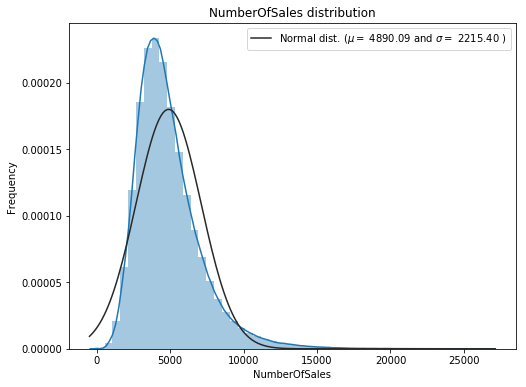

In [9]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
# fit the data with a normal distribution and 
sns.distplot(train['NumberOfSales'] , fit=stats.norm)

# and check the fitted mu and sigma
(mu, sigma) = stats.norm.fit(train['NumberOfSales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % train['NumberOfSales'].skew())
print("Kurtosis: %f" % train['NumberOfSales'].kurt())

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')

In [10]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["NumberOfSales"] = np.log1p(train["NumberOfSales"])
train_target =  np.log1p(train["NumberOfSales"]).copy()
(mu, sigma) = stats.norm.fit(train['NumberOfSales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % train['NumberOfSales'].skew())
print("Kurtosis: %f" % train['NumberOfSales'].kurt())


 mu = 8.40 and sigma = 0.44

Skewness: -0.637384
Kurtosis: 10.145847


Text(0.5,1,'NumberOfSales distribution')

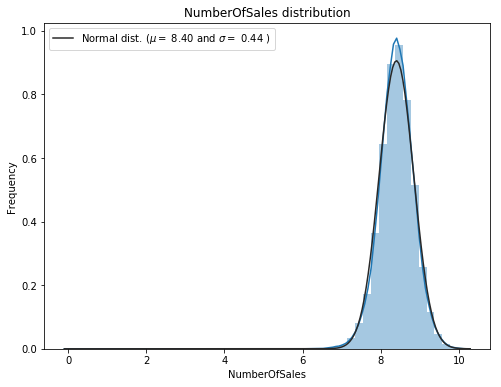

In [11]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
sns.distplot(train['NumberOfSales'] , fit=stats.norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')

# Merging train and test

In [12]:
all_data_index = train.columns.drop(['NumberOfSales','NumberOfCustomers'])
all_data = pd.concat((train.loc[:,all_data_index],test.loc[:,all_data_index]))

# One Hot Encoding

Encoding StoreType

In [13]:
StoreType = all_data['StoreType'];
all_data['StandardMarket'] = StoreType.apply(lambda x: 1 if x=='Standard Market' else 0);
all_data['HyperMarket'] = StoreType.apply(lambda x: 1 if x=='Hyper Market' else 0);
all_data['SuperMarket'] = StoreType.apply(lambda x: 1 if x=='Super Market' else 0);
all_data['ShoppingCenter'] = StoreType.apply(lambda x: 1 if x=='Shopping Center' else 0);

Encoding AssortmentType

In [14]:
TypeOfProducts = all_data['AssortmentType'];
all_data['General'] = TypeOfProducts.apply(lambda x: 1 if x=='General' else 0);
all_data['WithFishDepartment'] = TypeOfProducts.apply(lambda x: 1 if x=='With Fish Department' else 0);
all_data['WithNonFoodDepartment'] = TypeOfProducts.apply(lambda x: 1 if x=='With Non-Food Department' else 0);

Encoding Region

In [15]:
#OHE on the attribute "Region"
Region = all_data['Region'];
regionQuantity = Region.unique().size;
for i in range(0, regionQuantity-1):
    regionName = 'Region{}'.format(i);
    all_data[regionName] = Region.apply(lambda x: 1 if x==i else 0);

Encoding Month

In [16]:
months = []
all_date = all_data['Date']
for s in all_date:
    months.append(int(s[3:5]))
all_data['Month'] =months

In [17]:
import calendar

Month = all_data['Month'];
monthsQuantity = Month.unique().size
for i in range(1, monthsQuantity+1):
    monthName = calendar.month_name[i];
    all_data[monthName] = Month.apply(lambda x: 1 if x==i else 0);

Encoding Events

In [18]:
def ExtractEvents(df,col,sep):
    df[col]=df[col].astype('str').apply(lambda x: 'Nothing' if x=='nan' else x)
    events=list(df[col].unique())
    for event in events:
        if sep in event:
            event=event.split(sep)
            for i in event:
                events.append(i)
    events=list({x for x in events if sep not in x})
    for event in events:
        df[event]=df[col].astype('str').apply(lambda x: 1 if event in x else 0)
    del df[col]
    return df

all_data=ExtractEvents(all_data,'Events','-')
all_data[['Snow','Rain','Nothing']].head(10)

,Snow,Rain,Nothing
0,1,1,0
1,1,0,0
2,0,1,0
3,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,1,0
9,0,1,0
10,0,1,0


Encoding WindDirDegrees

In [19]:
all_data['WindDirDegrees'] = all_data['WindDirDegrees'].apply(lambda x: x + 360 if x<0 else x)
all_data['WindDirDegrees'] = all_data['WindDirDegrees'].apply(lambda x: math.floor(x*8/360))

In [20]:
size = all_data['WindDirDegrees'].unique()

In [21]:
size = all_data['WindDirDegrees'].unique().size

for i in range(0, size-1):
    wind = 'Wind{}'.format(i);
    all_data[wind] = all_data['WindDirDegrees'].apply(lambda x: 1 if x==i else 0);

In [22]:
all_data = all_data.drop(labels='StoreType', axis=1)
all_data = all_data.drop(labels='AssortmentType', axis=1)
all_data = all_data.drop(labels='Region', axis=1)
all_data = all_data.drop(labels='Month', axis=1)
all_data = all_data.drop(labels='Date', axis=1)
all_data = all_data.drop(labels='WindDirDegrees', axis=1)

In [23]:
all_data.head()

,StoreID,IsHoliday,HasPromotions,NearestCompetitor,Region_AreaKM2,Region_GDP,Region_PopulationK,CloudCover,Max_Dew_PointC,Max_Gust_SpeedKm_h,...,Rain,Fog,Wind0,Wind1,Wind2,Wind3,Wind4,Wind5,Wind6,Wind7
0,1000,0,0,326,9643,17130,2770,8.0,1,NaN,...,1,0,1,0,0,0,0,0,0,0
1,1000,0,0,326,9643,17130,2770,8.0,0,NaN,...,0,0,0,1,0,0,0,0,0,0
2,1000,0,0,326,9643,17130,2770,8.0,0,NaN,...,1,0,1,0,0,0,0,0,0,0
3,1000,0,0,326,9643,17130,2770,6.0,-3,NaN,...,0,0,0,0,1,0,0,0,0,0
5,1000,0,1,326,9643,17130,2770,NaN,-2,NaN,...,0,0,0,1,0,0,0,0,0,0


# Analyzing missing values

In [24]:
ratios = (all_data.isnull().sum() / len(all_data))*100
rate = ratios.drop(ratios[ratios == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :rate})
missing_data

,Missing Ratio
Max_Gust_SpeedKm_h,78.504657
CloudCover,8.810419
Min_VisibilitykM,2.419286
Mean_VisibilityKm,2.419286
Max_VisibilityKm,2.419286


Text(0.5,1,'Top Variables for % of Missing Values')

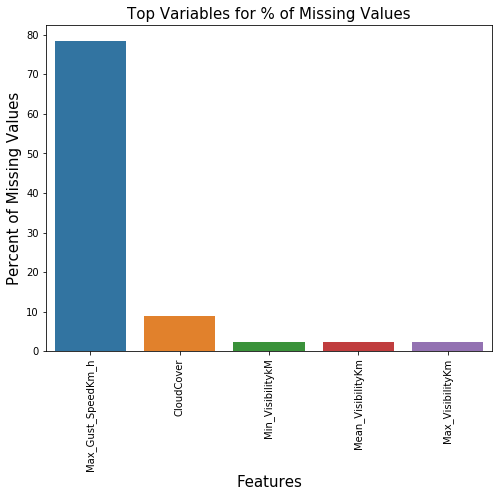

In [25]:
plt.subplots(figsize=(8,6))
plt.xticks(rotation='90')
sns.barplot(x=rate.index[:10], y=rate[:10])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Top Variables for % of Missing Values', fontsize=15)

## Droppinng Max_Gust_SpeedKm_h  
Too many missing values

In [26]:
all_data = all_data.drop(labels='Max_Gust_SpeedKm_h', axis=1)

## Inputing CloudCover  
Filling missing values with median to preserve an integer value

In [27]:
all_data["CloudCover"] = all_data.transform(lambda x: x.fillna(x.median()))

## Imputing Visibility

In [28]:
mean_of_min = math.ceil(all_data.loc[~np.isnan(all_data['Min_VisibilitykM'])]['Min_VisibilitykM'].describe()['mean'])
mean_of_max = math.ceil(all_data.loc[~np.isnan(all_data['Max_VisibilityKm'])]['Max_VisibilityKm'].describe()['mean'])
mean_of_mean = math.ceil(all_data.loc[~np.isnan(all_data['Max_VisibilityKm'])]['Max_VisibilityKm'].describe()['mean'])

In [29]:
all_data['Max_VisibilityKm'] = all_data['Max_VisibilityKm'].fillna(mean_of_max)
all_data['Min_VisibilitykM'] = all_data['Min_VisibilitykM'].fillna(mean_of_min)
all_data['Mean_VisibilityKm'] = all_data['Mean_VisibilityKm'].fillna(mean_of_mean)

In [30]:
all_data["Mean_VisibilityKm"].describe()

count    471544.000000
mean         12.526311
std           5.296018
min           0.000000
25%          10.000000
50%          11.000000
75%          14.000000
max          31.000000
Name: Mean_VisibilityKm, dtype: float64

In [31]:
all_data["Max_VisibilityKm"].describe()

count    471544.000000
mean         23.608177
std           9.021634
min           0.000000
25%          13.000000
50%          31.000000
75%          31.000000
max          31.000000
Name: Max_VisibilityKm, dtype: float64

In [32]:
ratios = (all_data.isnull().sum() / len(all_data))*100
rate = ratios.drop(ratios[ratios == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :rate})
missing_data

,Missing Ratio


In [33]:
all_data = all_data.drop(labels='StoreID', axis=1)
test_offset = train.shape[0]
train = all_data.iloc[0:test_offset,:]
test = all_data.iloc[test_offset:all_data.shape[0],:]

Saves test

In [34]:
test.to_csv("TestClean.csv")
test.shape

(37586, 68)

# Outliers Analysis

In [35]:
# Dataframe, Column, Quantile
def outliers(df,minq,maxq,col):
    min_v = df.quantile(minq)[col]
    max_v = df.quantile(maxq)[col]
    df1 = df.loc[df[col] > max_v]
    df2 = df.loc[df[col] < min_v]
    return pd.concat((df1,df2))[col]

In [36]:
def Winsorizing(df,minq,maxq,col):
    min_v = df.quantile(minq)[col]
    max_v = df.quantile(maxq)[col]
    df[col] = df[col].apply(lambda x: max_v if x > max_v else x)
    df[col] = df[col].apply(lambda x: min_v if x < min_v else x)

Division of features

In [37]:
binary_variables = pd.Index(['IsHoliday','HasPromotions'])  #un po' brutto non so come fare
for i in range(25,train.columns.size):
    index = pd.Index([train.columns[i]])
    binary_variables = binary_variables.append(index)

In [38]:
continous_variables = train.columns.difference(binary_variables)
continous_variables = continous_variables.drop('CloudCover')

In [39]:
ordinal_variables = pd.Index(['CloudCover'])

In [40]:
ordinal_variables

Index(['CloudCover'], dtype='object')

In [41]:
continous_variables

Index(['Max_Dew_PointC', 'Max_Humidity', 'Max_Sea_Level_PressurehPa',
       'Max_TemperatureC', 'Max_VisibilityKm', 'Max_Wind_SpeedKm_h',
       'Mean_Dew_PointC', 'Mean_Humidity', 'Mean_Sea_Level_PressurehPa',
       'Mean_TemperatureC', 'Mean_VisibilityKm', 'Mean_Wind_SpeedKm_h',
       'Min_Dew_PointC', 'Min_Humidity', 'Min_Sea_Level_PressurehPa',
       'Min_TemperatureC', 'Min_VisibilitykM', 'NearestCompetitor',
       'Precipitationmm', 'Region_AreaKM2', 'Region_GDP',
       'Region_PopulationK'],
      dtype='object')

In [42]:
binary_variables

Index(['IsHoliday', 'HasPromotions', 'StandardMarket', 'HyperMarket',
       'SuperMarket', 'ShoppingCenter', 'General', 'WithFishDepartment',
       'WithNonFoodDepartment', 'Region0', 'Region1', 'Region2', 'Region3',
       'Region4', 'Region5', 'Region6', 'Region7', 'Region8', 'Region9',
       'January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December', 'Snow',
       'Nothing', 'Hail', 'Thunderstorm', 'Rain', 'Fog', 'Wind0', 'Wind1',
       'Wind2', 'Wind3', 'Wind4', 'Wind5', 'Wind6', 'Wind7'],
      dtype='object')

In [43]:
#for v in continous_variables:
#    a = outliers(all_data,.01,.99,v).values
#    print("Number of outlier according to .01 and .99 quantile for "+v+" are : "+str(len(a)))
#    print("Perc. of outlier w.r.t the whole train "+ str(100*(len(a)/all_data.shape[0])))
#    print("")

In [44]:
train = train.copy()   #dovevo farlo altrimenti warning
for v in continous_variables:
    if (100*len(outliers(train,.01,.99,v).values)/len(train[v]) < 1):
        Winsorizing(train,.01,0.99,v)  

Now the outliers are managed  
Save train

In [45]:
train['NumberOfSales'] = train_target
train.to_csv("TrainClean.csv")

In [46]:
#for v in continous_variables:
#    a = outliers(all_data,.01,.99,v).values
#    print("Number of outlier according to .01 and .99 quantile for "+v+" are : "+str(len(a)))
#    print("Perc. of outlier w.r.t the whole train "+ str(100*(len(a)/all_data.shape[0])))
#    print("")

# Computing Correlation  

Numerical correlation, using Pearson Correlation

In [50]:
def compute_corr(df,var,degree):
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    new_dataset = df
    current_column = var
    corr = {}
    indexes = []
    for d in range(2,degree+1):
        column_name = var+" at the power of " + str(d)
        new_dataset[column_name] = new_dataset[current_column]*df[var]
       #new_dataset.plot(kind="scatter", x=column_name, y="NumberOfSales")
        corr[column_name] = new_dataset.corr()['NumberOfSales'][column_name]
        print(column_name +"  CORRELATION ::"+str(corr[column_name]))
        current_column = column_name
        indexes.append(current_column)
    
    if (df[var].values > 0).all():
        column_name = var+"logbase2"   
        new_dataset[column_name] = np.log2(df[var])
        indexes.append(current_column)
        #new_dataset.plot(kind="scatter", x=column_name, y="NumberOfSales")
        corr[column_name] = new_dataset.corr()['NumberOfSales'][column_name]
        print(column_name +"  CORRELATION ::"+str(corr[column_name]))
        column_name = var+"logbase10"
        new_dataset[column_name] = np.log10(df[var])
        indexes.append(current_column)
       #new_dataset.plot(kind="scatter", x=column_name, y="NumberOfSales")
        corr[column_name] = new_dataset.corr()['NumberOfSales'][column_name]
        print(column_name +"  CORRELATION ::"+str(corr[column_name]))
    
    return corr,indexes

In [51]:
continous_variables = continous_variables.append(pd.Index(['NumberOfSales']))  #need to readd the sales because to merge test and train for filling NaN 
continous_variables                                                            #need to drop 

Index(['Max_Dew_PointC', 'Max_Humidity', 'Max_Sea_Level_PressurehPa',
       'Max_TemperatureC', 'Max_VisibilityKm', 'Max_Wind_SpeedKm_h',
       'Mean_Dew_PointC', 'Mean_Humidity', 'Mean_Sea_Level_PressurehPa',
       'Mean_TemperatureC', 'Mean_VisibilityKm', 'Mean_Wind_SpeedKm_h',
       'Min_Dew_PointC', 'Min_Humidity', 'Min_Sea_Level_PressurehPa',
       'Min_TemperatureC', 'Min_VisibilitykM', 'NearestCompetitor',
       'Precipitationmm', 'Region_AreaKM2', 'Region_GDP', 'Region_PopulationK',
       'NumberOfSales', 'NumberOfSales'],
      dtype='object')

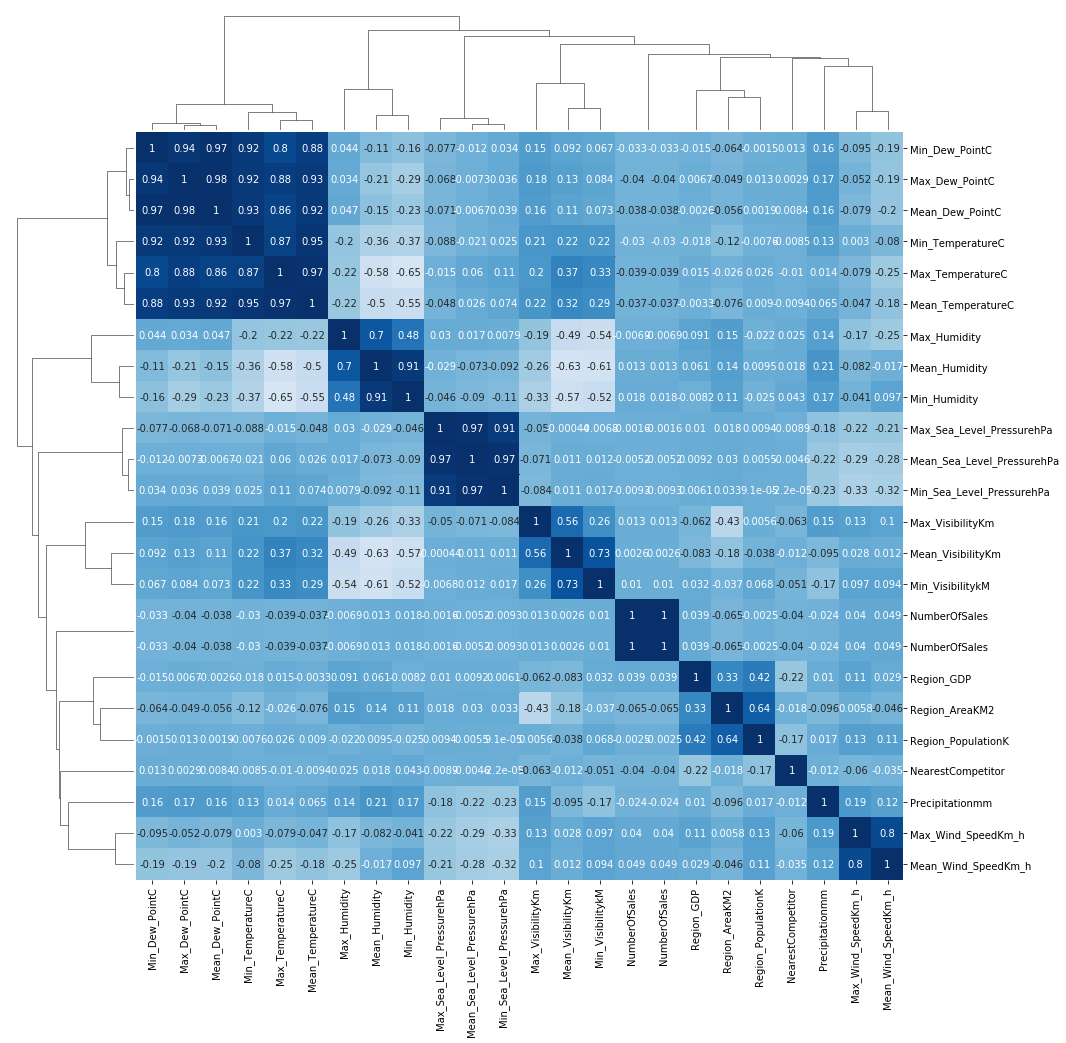

In [52]:
cov=train[continous_variables].corr(method='pearson')
cm = sns.clustermap(cov, annot=True, center=0, cmap="Blues", figsize=(16, 16))
cm.cax.set_visible(False)

In [ ]:
for v in continous_variables:
    compute_corr(train,v,4)

Max_Dew_PointC at the power of 2  CORRELATION ::-0.0445669332329193
Max_Dew_PointC at the power of 3  CORRELATION ::-0.04346230885453573
Max_Dew_PointC at the power of 4  CORRELATION ::-0.04080423367390754
Max_Humidity at the power of 2  CORRELATION ::-0.006890727019622646
Max_Humidity at the power of 3  CORRELATION ::-0.006856294960306236
Max_Humidity at the power of 4  CORRELATION ::-0.00683655202154902
Max_Humiditylogbase2  CORRELATION ::-0.0070064827803320625
Max_Humiditylogbase10  CORRELATION ::-0.0070064827803275045
Max_Sea_Level_PressurehPa at the power of 2  CORRELATION ::-0.0015052207900005557
Max_Sea_Level_PressurehPa at the power of 3  CORRELATION ::-0.001421816039156238
Max_Sea_Level_PressurehPa at the power of 4  CORRELATION ::-0.0013400644822140657
Max_Sea_Level_PressurehPalogbase2  CORRELATION ::-0.0016770870404730904
Max_Sea_Level_PressurehPalogbase10  CORRELATION ::-0.0016770870404733183
Max_TemperatureC at the power of 2  CORRELATION ::-0.04646342873473912
Max_Tempera